In [5]:
# https://www.youtube.com/watch?v=MSBY28IJ47U&t=470s
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None

In [6]:
df=pd.read_csv('Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3220,8205-VSLRB,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),77.30,5498.2,No
5569,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,Yes
5190,3001-UNBTL,Male,1,Yes,Yes,29,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.95,2964.8,No
6306,0186-CAERR,Male,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),116.30,8309.55,No
4337,2674-MLXMN,Female,1,No,No,71,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.65,6951.15,No


In [7]:
df.drop('customerID',axis='columns',inplace=True)


In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [14]:
df.shape

(7043, 20)

In [15]:
df.iloc[488]['TotalCharges']

' '

In [16]:
df1=df[df.TotalCharges!=' ']

In [17]:
df1.shape

(7032, 20)

In [18]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [20]:
df1.TotalCharges.dtypes

dtype('float64')

In [21]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


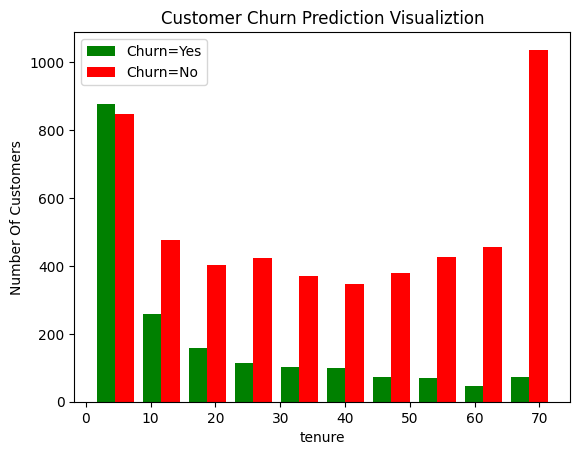

In [22]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

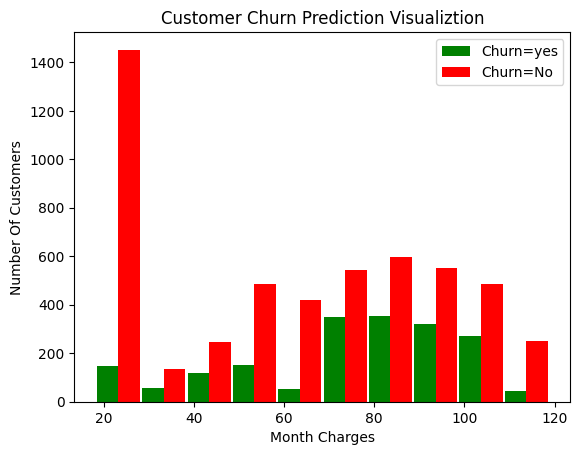

In [23]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("Month Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
blood_sugar_men=[113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women=[67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=yes','Churn=No'])
plt.legend()


In [24]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} :{df[column].unique()}')

In [25]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [26]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [27]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [28]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [29]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\zengj\AppData\Local\Temp\ipykernel_16012\188446264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\zengj\AppData\Local\Temp\ipykernel_16012\188446264.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1,'N

In [30]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [31]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [32]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\zengj\AppData\Local\Temp\ipykernel_16012\698335744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\zengj\AppData\Local\Temp\ipykernel_16012\698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].repl

In [33]:
df1['gender'].unique()

array([1, 0])

In [34]:
df1.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6484,0,0,0,0,37,1,1,DSL,1,1,1,1,1,1,One year,1,Bank transfer (automatic),90.60,3358.65,0
4019,0,0,0,0,14,1,1,Fiber optic,0,1,0,0,1,1,Month-to-month,1,Electronic check,100.55,1415.55,1
2164,0,0,1,1,70,1,0,Fiber optic,1,1,1,1,1,0,Two year,1,Credit card (automatic),101.10,6994.80,0
859,0,0,1,1,72,0,0,DSL,1,1,1,1,1,1,Two year,1,Credit card (automatic),64.80,4719.75,0
4390,0,0,1,1,22,1,0,DSL,1,1,0,1,0,0,Month-to-month,1,Mailed check,57.95,1271.80,0
2710,1,0,1,0,24,1,0,No,0,0,0,0,0,0,One year,0,Credit card (automatic),20.40,482.80,0
4754,0,0,1,0,68,1,1,No,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),25.25,1728.20,0
4327,1,0,0,0,7,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,69.90,497.30,0
5576,1,0,0,0,1,1,0,DSL,0,0,0,0,1,0,Month-to-month,1,Mailed check,53.55,53.55,1
5874,1,0,0,0,10,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,100.60,1060.20,1


In [35]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [36]:
for col in df2:
    print(f'{col}: {df2[col].unique()} {df2[col].dtype}')

gender: [1 0] int64
SeniorCitizen: [0 1] int64
Partner: [1 0] int64
Dependents: [0 1] int64
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] int64
PhoneService: [0 1] int64
MultipleLines: [0 1] int64
OnlineSecurity: [0 1] int64
OnlineBackup: [1 0] int64
DeviceProtection: [0 1] int64
TechSupport: [0 1] int64
StreamingTV: [0 1] int64
StreamingMovies: [0 1] int64
PaperlessBilling: [1 0] int64
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] float64
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] float64
Churn: [0 1] int64
InternetService_DSL: [ True False] bool
InternetService_Fiber optic: [False  True] bool
InternetService_No: [False  True] bool
Contract_Month-to-month: [ True False] bool
Contract_One year: [False  True] bool
Contract_Two year: [False  True] bool
PaymentMethod_Bank t

In [37]:
True_or_False_columns=['InternetService_DSL','InternetService_Fiber optic','InternetService_No','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
for col in True_or_False_columns:
    df2[col].replace({True:1,False:0},inplace=True)

C:\Users\zengj\AppData\Local\Temp\ipykernel_16012\2246127551.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].replace({True:1,False:0},inplace=True)
C:\Users\zengj\AppData\Local\Temp\ipykernel_16012\2246127551.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col].replace({True:1,F

In [38]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2149,1,0,0,0,46,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
5059,1,0,0,0,36,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6399,1,0,0,0,55,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6089,1,1,1,0,1,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3947,1,0,0,0,5,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0


In [39]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [40]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6351,0,0,1,1,50,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
367,1,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
706,1,0,0,0,65,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
2447,0,0,0,0,7,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
263,1,0,0,0,31,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
3196,1,0,0,0,3,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1907,1,0,0,0,7,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
2437,1,0,0,0,7,1,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
6116,1,0,0,0,48,1,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
6277,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [41]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [42]:
df2['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [43]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [44]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4039,0,0,0,0,0.084507,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
181,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2471,1,0,1,0,0.732394,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [45]:
df2['MonthlyCharges'].sample(5)

4659    0.856219
5069    0.568159
3458    0.701990
3446    0.890547
2340    0.266169
Name: MonthlyCharges, dtype: float64

In [46]:
for col in df2:
    print(f'{col}: {df2[col].unique()} {df2[col].dtype}')

gender: [1 0] int64
SeniorCitizen: [0 1] int64
Partner: [1 0] int64
Dependents: [0 1] int64
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127] float64
PhoneService: [0 1] int64
MultipleLines: [0 1] int64
OnlineSecurity: [0 1] int64
OnlineBa

In [47]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=5)

In [49]:
X_train.shape

(5625, 26)

In [50]:
X_test.shape

(1407, 26)

In [51]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [52]:
len(X_train.columns)

26

In [53]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    # keras.layer.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50)

e:\project\keras\kerasenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7141 - loss: 0.5671
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.4348
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7930 - loss: 0.4322
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7991 - loss: 0.4235
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8014 - loss: 0.4231
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8021 - loss: 0.4166
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.4137
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4229
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8151 - loss: 0.3993
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8140 - loss: 0.4059
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.4099
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [54]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.4306


[0.4441678822040558, 0.7945984601974487]

In [55]:
yp=model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.34479812],
       [0.40020078],
       [0.01463129],
       [0.7541885 ],
       [0.54418254]], dtype=float32)

In [56]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [57]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [58]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [59]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.55      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

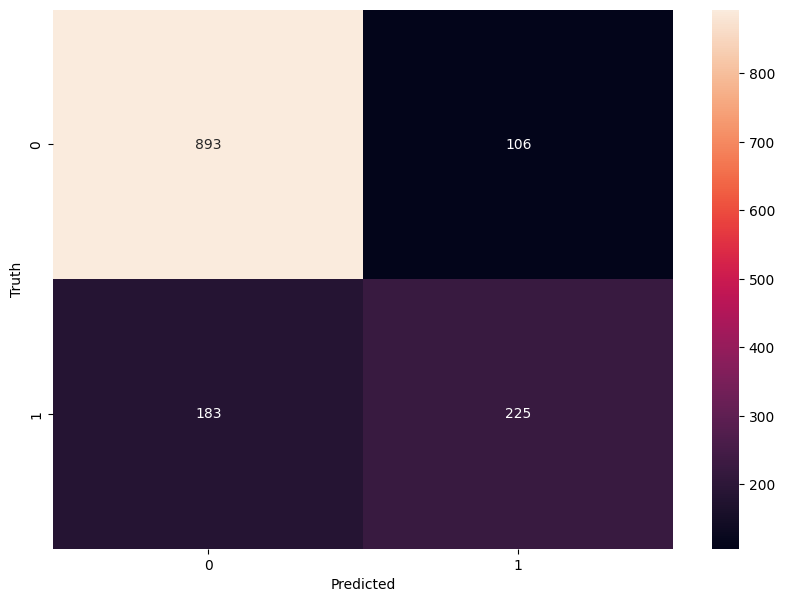

In [60]:
import seaborn as sn
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Acuracy

In [61]:
round((895+215)/(895+215+193+104),2)

0.79

Precision for 0 class. i.e. Precision for customers who did not churn

In [62]:
round(895/(895+193),2)

0.82

Precision for 1 class, i.e. Precision for customers who actually churned

In [63]:
round(215/(215+104),2)

0.67

Recall for 0 class

In [64]:
round(895/(895+104),2)

0.9

Recall for 1 class

In [65]:
round(215/(215+193),2)

0.53

Exercise

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 

## Solution :
https://www.kaggle.com/code/sabikasabika/bank-turnover-prediction-model-with-tensorflow

### Inbalance dataset test

In [67]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report


In [68]:
def ANN(X_train,y_train,X_test, y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weithts) 
        
    print(model.evaluate(X_test,y_test))       
    
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)
    
    print("Classification Report:\n",classification_report(y_test,y_preds))
    
    return y_preds
    

In [69]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


e:\project\keras\kerasenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6327 - loss: 0.6033
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7893 - loss: 0.4475
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7961 - loss: 0.4257
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8018 - loss: 0.4249
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7963 - loss: 0.4224
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.4054
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 0.4096
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8050 - loss: 0.4086
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8145 - loss: 0.4005
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8181 - loss: 0.3954
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8067 - loss: 0.4045
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [75]:
#Class count
count_class_0,count_class_1=df1.Churn.value_counts()
count_class_0,count_class_1

(5163, 1869)

In [73]:


#Divide by class
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]
df_class_0.shape,df_class_1.shape

((5163, 27), (1869, 27))

In [76]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [77]:
df_class_0_under=df_class_0.sample(count_class_1)

In [83]:
#concat
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [87]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=15,stratify=y)

In [88]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [89]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


e:\project\keras\kerasenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5468 - loss: 0.6826
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7583 - loss: 0.5343
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 0.4782
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7713 - loss: 0.4704
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7874 - loss: 0.4748
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4786
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7660 - loss: 0.4777
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7805 - loss: 0.4612
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.4692
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7754 - loss: 0.4822
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7853 - loss: 0.4781
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 - lo

### Method 2: OverSampling

In [90]:
count_class_0,count_class_1

(5163, 1869)

In [98]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape

(5163, 27)

In [ ]:
df_class_0,df_class_1_over

In [100]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [ ]:
x=df_5te